## CAPSTONE PROJECT: ISSY LES MOULINEAUX

### 1) Introduction (where you discuss the business problem and who would be interested in this project.)


#### Data gourvernance



Several years ago, the french gouvernment decided to grand access to their public datasets as 'open data'.
Datas are free of charge, and contains many interesting items, especially related to companies and people.
My planned capstone project was to combine Foursquare Data to Open Data from Paris city hall.

But while I tried to access data from the website https://data.iledefrance.fr , I read the 'confidentiality items' in detail and discovered, that some data are restricted:
They are free, but you need to fill forms and apply procedures to declare usage... and this procedure takes long time and much efforts, which are not compatible with my Capstone Project.

Finally, I am proposing a capstone project in accordance with data gouvernance's regulation.


 - <u>Problem definition:</u> Where are the best places to stay in ISSY LES MOULINEAUX?


 - <u>Stakeholder</u>: The people interested in this project are tourists, which are looking for a description and an objective overview of the city.


#### Data where you describe the data that will be used to solve the problem and the source of the data.



Sources of data are:<br>
- Foursquare: List of POI (points of interest)<br>
  Data are related to POI and each POI has a list of comments related to each of them.<br>
- Open Data from Issy-Les-Moulineaux city hall: https://data.iledefrance.fr/explore/dataset/points-dinteret-de-la-ville-dissy-les-moulineaux/table/<br>
  Data available here are linked to all activities related to this city: Companies (>50 employees), restaurants, public transport, ...<br>


In [2]:
import os
import numpy as np
import pandas as pd

 Open Data from Issy-Les-Moulineaux

In [3]:
opendata = pd.read_csv('https://data.iledefrance.fr/explore/dataset/points-dinteret-de-la-ville-dissy-les-moulineaux/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B',delimiter = ';')
opendata.head()                  

,Titre,Favoris,Catégorie1,Catégorie2,Catégorie3,Catégorie4,Description,Adresse,Codepostal,Ville,Téléphone,URL,Email,WGS84,Latitude,Longitude
0,Parking souterrain île Saint Germain,NaN,Vie pratique,Transports,Parkings voitures sous-sol,NaN,Parking souterrain payant avec 220 places. Ouv...,175 Quai de Stalingrad,92130.0,Issy-les-Moulineaux,NaN,http://www.vincipark.com,NaN,"48.824835,2.257466",48.824835,2.257466
1,Vélib' Place Corentin Celton,NaN,Vie pratique,Transports,Vélib,NaN,Emplacement sur trottoir avec 55 places,40 Boulevard Gambetta,92130.0,Issy-les-Moulineaux,NaN,www.velib.paris.fr,NaN,"48.827277,2.278229",48.827277,2.278229
2,Aire de Jeux Parc de la Résistance,NaN,Vie pratique,Petite Enfance,NaN,NaN,Jeux pour les 2 à 6 ans. Accessible par l'allé...,Parc de la Résistance,92130.0,Issy-les-Moulineaux,NaN,www.issy.com/vie-quotidienne/petite-enfance,iris@ville-issy.fr,"48.819854,2.251484",48.819854,2.251484
3,Aire de Jeux Parc Rodin,NaN,Vie pratique,Vie pratique,Petite Enfance,"Environnement, cadre de vie",Jeux pour les 1 à 6 ans.,Boulevard Rodin,92130.0,Issy-les-Moulineaux,NaN,www.issy.com/ma-ville/environnement/profitez-d...,iris@ville-issy.fr,"48.818111,2.258728",48.818111,2.258728
4,Bureau de vote 003 Palais des Arts et des Cong...,NaN,Vie pratique,"Administrations, vie citoyenne et vie pratique",Bureaux de vote,NaN,NaN,"25, avenue Victor Cresson",92130.0,Issy-les-Moulineaux,NaN,NaN,NaN,"48.822972,2.269836",48.822972,2.269836


In [4]:
opendata.columns

Index(['Titre', 'Favoris', 'Catégorie1', 'Catégorie2', 'Catégorie3',
       'Catégorie4', 'Description', 'Adresse', 'Codepostal', 'Ville',
       'Téléphone', 'URL', 'Email', 'WGS84', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
opendata.shape

(1188, 16)

In [11]:
opendata[['Catégorie3','Titre']].groupby(['Catégorie3']).count().sort_values('Titre',ascending=False).head(n=10)

,Titre
Catégorie3,
Restauration-Bars-Tabacs,150
Parkings deux roues,125
Conteneurs à verre,63
Arbres remarquables,50
Bureaux de vote,46
Coiffeurs,32
Sculptures de métal,27
"Epiceries, supérettes et grande distribution",27
Agences immobilières,26


Now lets play with Foursquare.
But keep in mind, that the free API is limited, and I did not pay the pro version.
Therefore I will limit the list to restaurants and bars only

In [7]:
opendata_restaurants=opendata[opendata['Catégorie3']=='Restauration-Bars-Tabacs']
opendata_restaurants.head()

,Titre,Favoris,Catégorie1,Catégorie2,Catégorie3,Catégorie4,Description,Adresse,Codepostal,Ville,Téléphone,URL,Email,WGS84,Latitude,Longitude
19,P comme Papilles,NaN,Vie pratique,"Commerces, consommation",Restauration-Bars-Tabacs,Restauration rapide-Sandwicherie-Livraison à d...,Restauration rapide. Ouvert du lundi au vendre...,"16, rue Michel Jazy",92130.0,Issy-les-Moulineaux,01 58 88 07 03,NaN,NaN,"48.827007,2.264509",48.827007,2.264509
20,L'Instant,NaN,Vie pratique,"Commerces, consommation",Restauration-Bars-Tabacs,Restaurants-Cuisine traditionnelle,Spécialisé dans les fruits de mer. Ouvert du l...,"86-92, rue Camille Desmoulins",92130.0,Issy-les-Moulineaux,01 41 90 81 76,NaN,NaN,"48.828657,2.263026",48.828657,2.263026
22,Le Porte-Plume,NaN,Vie pratique,"Commerces, consommation",Restauration-Bars-Tabacs,Débits de tabac,"Tabac, loto, PMU, presse. Ouvert du lundi au s...","58, avenue Victor Cresson",92130.0,Issy-les-Moulineaux,01 46 42 44 85,NaN,NaN,"48.822298,2.26617",48.822298,2.266170
45,Le Stade d'Issy,NaN,Vie pratique,"Commerces, consommation",Restauration-Bars-Tabacs,Restaurants-Cuisine traditionnelle,Ouvert du lundi au vendredi. Service uniquemen...,"5, avenue Jean Bouin",92130.0,Issy-les-Moulineaux,01 41 90 06 54,NaN,NaN,"48.825254,2.26492",48.825254,2.264920
52,Le Relais de Bavière,NaN,Vie pratique,"Commerces, consommation",Restauration-Bars-Tabacs,Restaurants-Cuisine traditionnelle,Spécialités allemandes. Ouvert toute la semain...,"27, rue Danton",92130.0,Issy-les-Moulineaux,06 88 52 11 55,NaN,NaN,"48.824458,2.270727",48.824458,2.270727


Foursquare Data

In [29]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [30]:
import folium # map rendering library
import requests # library to handle requests

In [31]:

CLIENT_ID = 'FM5DMW2Y4XRLA0EQCAM3VOH40WTS5GIAV5I130M2ROQULLOZ'
CLIENT_SECRET = 'Y3P44JL2XIMG2HIJXJCZXNQIQMDOKUNYWHJ1ISMSS3RWDBL3'
VERSION = '20180605'


In [59]:

#get 1500 relevant data 2km around the city.
#Not only in this city (because the neighbourhood is also important)

def getNearbyVenues(name, lat, lng, radius = 2000, LIMIT = 1500):
    venues_list=[]
    url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format( \
            CLIENT_ID,  \
            CLIENT_SECRET, \
            VERSION, \
            lat,  \
            lng,  \
            radius, \
            LIMIT)

    #print( requests.get(url).json())
    results = requests.get(url).json()['response']
    #print('result',results)
    for v in results['venues'] :
            venues_list.append([(v['name'],
                                 v['id'],
                                 v['location']['lat'],
                                 v['location']['lng'], 
                                 v['categories'][0]['name'])])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Venue',
                             'Venue Id',
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    #print('nearby_venues',nearby_venues.shape)
    return(nearby_venues)


Issy_venues = getNearbyVenues(name = 'Issy les moulineaux',
                                 lat = opendata_restaurants['Latitude'].median(),
                                 lng = opendata_restaurants['Longitude'].median())




In [60]:
Issy_venues.head()

,Venue,Venue Id,Venue Latitude,Venue Longitude,Venue Category
0,Laura Traiteur,4b9e2041f964a52039cc36e3,48.826148,2.265917,Falafel Restaurant
1,L'Aviation,4b45ce92f964a520921026e3,48.828139,2.273809,Bistro
2,Grains et Gourmandises,5d8de602a67bc00008d9ef5c,48.833960,2.295044,Bakery
3,Mama Shelter Paris West,5d3727455c9d4c00083efc5e,48.829334,2.292303,Restaurant
4,Farah Mahal,4fd9c2c1e4b0318de7b31e16,48.823950,2.262265,Indian Restaurant


### 2) Methodology section


#### 2.1) Classification of POI: Short description of the city and its facilities.


##### 2.1.1) Count of Venues for each category


In [46]:
opendata.groupby(['Catégorie2'])[['Titre']].count().sort_values('Titre',ascending=False)

,Titre
Catégorie2,
"Commerces, consommation",473
Transports,173
"Environnement, cadre de vie",131
"Administrations, vie citoyenne et vie pratique",68
Culture et loisirs,59
Petite Enfance,54
Education,50
Santé,44
Entreprises TIC + de 50 salariés,35


##### 2.1.2) Map of Restaurants


In [58]:


map_venues = folium.Map(location=[48.828139 , 2.273809], zoom_start = 14)

for lat, lng, venue, cat in zip(opendata_restaurants['Latitude'],
                                opendata_restaurants['Longitude'],
                                opendata_restaurants['Titre'],
                                opendata_restaurants['Catégorie2']):
    label = '{}, {}'.format(venue, cat)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [lat, lng],
        popup = label).add_to(map_venues)

map_venues



##### 2.1.3) Finding the main attractive neighbourhood in this city. (KNN)
If we consider, that restaurants are located where the main activities are... then we can focus on restaurants to highlight attractiveness of neighbourhoods


#### 2.2) Classification of Comments: 


In [48]:
# import k-means from clustering stage
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import jaccard_similarity_score
# from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import math

In [49]:
#opendata_restaurants.groupby(['Latitude','Longitude','Titre'])[['Titre']].count().sort_values('Titre',ascending=False)
#opendata_restaurants[['Latitude','Longitude','Titre']].groupby(['Latitude','Longitude','Titre']).count().sort_values('Titre',ascending=False)
from sklearn.cluster import KMeans



In [50]:
opendata_restaurants[['Latitude','Longitude']].head()

,Latitude,Longitude
19,48.827007,2.264509
20,48.828657,2.263026
22,48.822298,2.266170
45,48.825254,2.264920
52,48.824458,2.270727


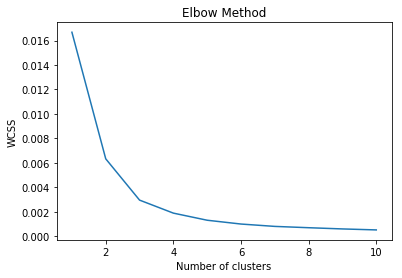

In [51]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(opendata_restaurants[['Latitude','Longitude']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The best number of K is 6: There are 6 main locations in this city, related to restaurants

In [57]:
print('In blue are the restaurants, and in red are the KNN main locations')
map_clusters = folium.Map(location=[48.822664, 2.267804], zoom_start = 14)



kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit(opendata_restaurants[['Latitude','Longitude']])
pred_y = kmeans.fit_predict(opendata_restaurants[['Latitude','Longitude']])

for i in range(len(kmeans.cluster_centers_)):
    lat,lon=kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1]
    #print(i,[lat, lon])

    label = folium.Popup(' Cluster ' + str(i), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)


    
#map_clusters.save("doggie_clusters.html")    
map_clusters

In blue are the restaurants, and in red are the KNN main locations


##### 2.2.1) Global overview of the whole city, and for all categories.
Now lets compare the KNN values found to the full dataset

In [56]:
map_clusters = folium.Map(location=[48.822664, 2.267804], zoom_start = 14)


#just add the full dataset to the same map
opendata_restaurants=opendata[opendata['Catégorie3']!='Restauration-Bars-Tabacs']

for lat, lon, poi, cluster in zip(opendata_restaurants['Latitude'], opendata_restaurants['Longitude'], opendata_restaurants['Titre'], opendata_restaurants['Catégorie2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3).add_to(map_clusters)

    
#just add the full dataset to the same map

for lat, lon, poi, cluster in zip(Issy_venues['Venue Latitude'], Issy_venues['Venue Longitude'], Issy_venues['Venue'], Issy_venues['Venue Category']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.3).add_to(map_clusters)

    
    
    
# redraw the red points to appear upper to others... (no added value here, except for a better appearance)
for i in range(len(kmeans.cluster_centers_)):
    lat,lon=kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1]
    #print(i,[lat, lon])

    label = folium.Popup(' Cluster ' + str(i), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)
    
#map_clusters.save("doggie_clusters.html")    
map_clusters


- Blue spots: Open Database from the french gourvernment
- Green spots: Foursquare data
- Red spots: Points of interest found by KNN using the restaurants declared in the open database



### 3) Results section (where you discuss the results)


After cleaning data (1), we studied the town itself (2): Attractiveness, Number of point of interests.<br>

First conclusion: The map looks coherent with our first supposition: There is a link between the restaurants and the main items of the city.<br>
Second conclusion: Foursquare only have very few POI<br>
<br>
<br>
<br>


### 4) Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.


Does this mean, that this city is not interesting, whereas there are lots of items in it ?<br>
I believe, that French people does not know FOURSQUARE. Only tourists does. And tourists focuses on Paris... and not on city around it.<br>



### 5) Conclusion section where you conclude the report.


Foursquare only proposes details about each POI. There is no global overview for a town.<br>
Therefore, a tourist looking for an attractive place does not know it the city worst the trip...<br>
In this Capstone Project, the approach proposes an overview on a global place.<br>
By applying this method to other cities, we are able to compare cities with each other...<br>


----------END----------